La Seine est entrée en crue en juin 2016. La région parisienne a été touchée dans son ensemble, plus ou moins gravement selon les endroits. Parmi les questions qui reviennent souvent dans les médias se trouve celle du caractère exceptionnel des 6 mètres de niveau relevés sur la Seine à Paris. Dans ce billet, nous allons essayer de répondre à cette question à l'aide de données mises à disposition par l'état. 

# Les données hydrologiques concernant la Seine sont-elles publiées ?  

Après recherche, il s'avère que de nombreuses données hydrologiques sont publiées sur le portail <http://hydro.eaufrance.fr/>. Celui-ci dépend du ministère de l'écologie, du développement durable et de l'énergie et fournit notamment des données mesurées à Paris sur le niveau de la Seine. Une plaquette introductive à ce portail est disponible ici : <http://www.hydro.eaufrance.fr/upload/docsutiles/Plaquette_HydroWeb_3.pdf>. 

On trouve trois ponts à Paris pour lesquels des mesures sont disponbiles : le pont national, le pont d'Austerlitz et le pont royal. Cependant les données disponibles couvrent des périodes plus ou moins longues et nous nous intéressons donc ici seulement au pont d'Austerlitz. 

Deux données sont disponibles sur le pont d'Austerlitz : le niveau et le débit. J'ai travaillé sur les fichiers extraits de la banque Hydro (inscription gratuite) pour nettoyer ces données et permettre de les afficher. Nous allons faire ceci à l'aide de Pandas :

In [2]:
import pandas as pd

Nous allons également configurer nos sorties graphiques :

In [34]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib notebook

# Visualisation des niveaux 

Commençons par charger les données de niveau (en cm) mesurées au pont d'Austerlitz.

In [35]:
df = pd.read_csv('data/export_h_complet.csv', parse_dates=[0])
df = df.set_index(df.pop('date'))

In [36]:
df.head(10)

,h
date,
1885-09-26 08:00:00,90.0
1885-10-30 15:00:00,230.0
1885-11-30 15:00:00,250.0
1885-12-11 08:00:00,560.0
1886-01-30 08:00:00,400.0
1886-02-04 15:00:00,460.0
1886-03-08 08:00:00,330.0
1886-04-12 08:00:00,140.0
1886-05-14 08:00:00,130.0


On peut se faire une idée de ces points de données en les reportant sur un graphique.

<IPython.core.display.Javascript object>


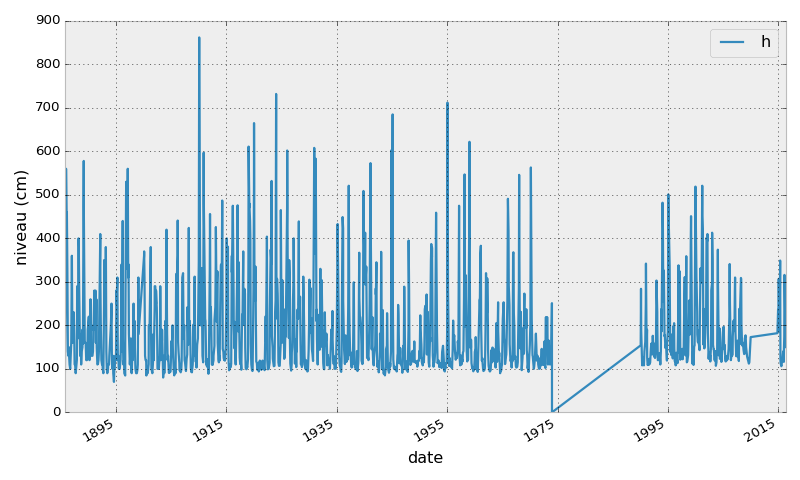

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.line(ax=ax)
plt.ylabel('niveau (cm)')
plt.tight_layout()

Comme on peut le voir sur le graphique ci-dessus, des mesures sont manquantes, en particulier sur les vingt années entre 1975 et 1995, mais aussi dans les années 2010.

Si l'on s'intéresse au maximum par année, on obtient la courbe suivante :

<IPython.core.display.Javascript object>


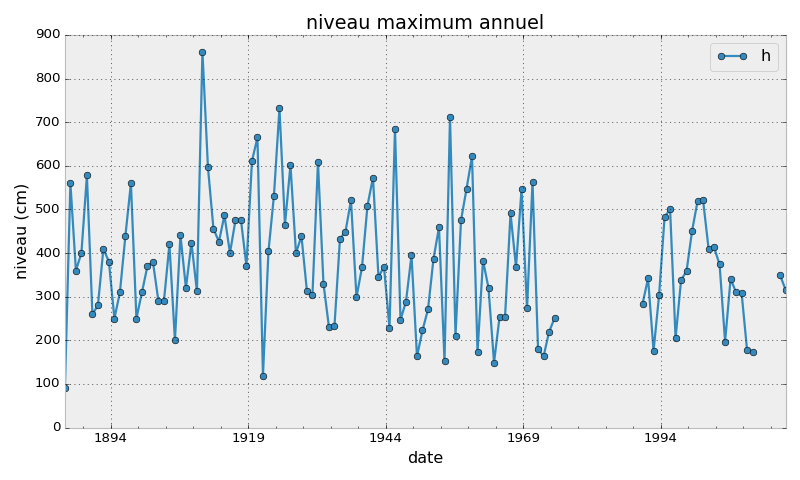

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
df.resample('12M').max().plot(ax=ax, style='-o')
plt.ylabel('niveau (cm)')
plt.title('niveau maximum annuel')
plt.tight_layout()

On retrouve dans cette série la "crue du siècle" de 1910 avec ses 8 mètres 62, mais également des crues importantes en 1924, 1945 ou 1955.

Cette série des maxima nous permet de construire un premier graphe des périodes de retour pour les différents niveaux de crue. La période de récurrence se calcule à l'aide de la formule suivante :
$$
\text{nombre d'années de données} + 1 \over \text{nombre d'évènements}
$$

Par exemple, pour un niveau de 6 mètres, on peut compter le nombre d'évènements supérieurs en 131 années de données :

In [47]:
h_max = df.resample('12M').max()
h_max[h_max.h > 600]

,h
date,
1910-09-30,862.0
1919-09-30,611.0
1920-09-30,665.0
1924-09-30,732.0
1926-09-30,602.0
1931-09-30,608.0
1945-09-30,685.0
1955-09-30,712.0
1959-09-30,622.0


On en déduit que des crues de plus de 6 m ont un temps de retour d'environ 15 ans :

In [51]:
(131 + 1) / h_max[h_max.h > 600].shape[0]

14.666666666666666

On peut systématiser ce calcul en prenant des niveaux entre 200 et 1000 cm.

In [53]:
import numpy as np

In [56]:
levels = np.linspace(200, 1000)
return_periods = [132 / sum(h_max.h.values > level) for level in levels]

<IPython.core.display.Javascript object>


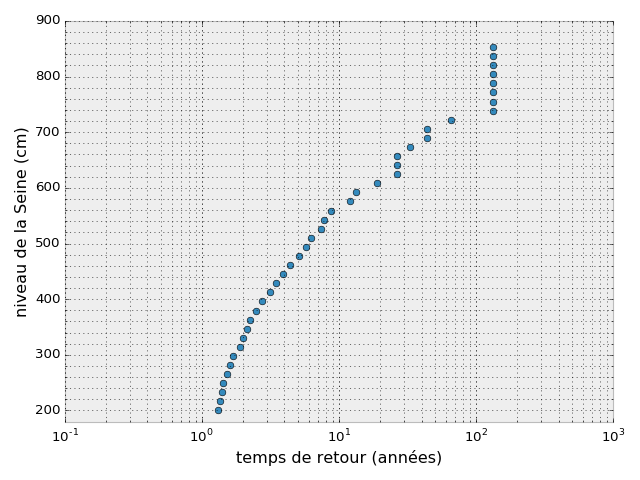

(180, 900)

In [60]:
plt.figure()
plt.semilogx(return_periods, levels, 'o')
plt.xscale('log', subsx=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.minorticks_on()
plt.grid(which='minor')
plt.xlabel('temps de retour (années)')
plt.ylabel('niveau de la Seine (cm)')
plt.tight_layout()
plt.xlim(0.1, 1000)
plt.ylim(180, 900)

Le graphique précédent nous indique que des crues de plus de 6 mètres ont une période de récurrence d'environ 10 ans. Evidemment, il faut tenir compte du fait que le graphique précédent est purement empirique. Mais cela permet déjà de formuler un début de réponse quant à la question posée au début de ce billet : une crue de 6 mètres est-elle exceptionnelle ? D'après les données publiques disponibles, il me semble raisonnable de répondre par la négative. Cela dit, il faut également signaler que les données ne montrent pas de crue de 6 mètres depuis 1960 (attention, il manque beaucoup de données). De plus, le bassin versant de la Seine a été fortement aménagé depuis la crue de 1910, ce qui peut avoir provoqué des modifications du comportement de crue de la Seine. Pour plus de détails, on pourra se reporter aux émissions récentes du Dessous des cartes, qui permettent d'aborder le sujet fascinant des crues de la Seine : 

- première partie : <http://ddc.arte.tv/nos-cartes/crues-de-la-seine-risque-regulier-risque-oublie-1-2>
- deuxième partie : <http://ddc.arte.tv/nos-cartes/crues-de-la-seine-risque-regulier-risque-oublie-2-2>

# Conclusions 

Dans ce billet nous avons investigué le sujet des crues de la Seine à l'aide de données publiques. Il s'avère qu'un niveau de crue de 6 mètres a déjà observé fréquemment dans le passé, avec une période de retour d'environ 10 ans sur les données disponibles depuis 1885 (avec un certain nombre de données manquantes). Si l'on ajoute à ces données les informations données par l'émission du Dessous des cartes, il faut conclure que de telles crues ne peuvent pas être considérées comme exceptionnelles et que l'île de France reste soumise à un fort risque d'inondation lié à la Seine et ses affluents, qui pourrait avoir des conséquences très graves (coupures d'électricité, eau potable, transports routiers, maritimes, en communs, la liste est longue...).

Ce billet est sous licence BSD. Il est disponible sous forme de Notebook Jupyter, de même que les données qui ont servies à l'analyse sur <https://github.com/flothesof/crues-seine-2016>.